In [1]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


Welcome to JupyROOT 6.26/08


# Relation between <$\sigma$v> and $t$

### $\log \mathcal{L} = N_{off}\log B - S - (1+\alpha)B + \sum \log \left( \alpha B \mathcal{P}_{bk} (E_i) + S \mathcal{P}_{s}(E_i) \right)$
 
### $\log \mathcal{L_{null}} = N_{off}\log B_{null} - (1+\alpha)B_{null} + \sum \log \left( \alpha B_{null} \mathcal{P}_{bk} (E_i) \right)$

### $\Delta log \mathcal{L} = N_{off} \log \frac{B}{B_{null}} - S - (1+\alpha)(B-B_{null}) \sum \log \frac{\alpha B \mathcal{P}_{bk} (E_i) + S \mathcal{P}_{s}(E_i) }{\alpha B_{null} \mathcal{P}_{bk} (E_i)}$

### $\Delta log \mathcal{L}_{t_1} = \Delta log \mathcal{L}_{t_2} = 1.35 $

### $N_{off, 1}\log \frac{B_1}{B_{null, 1}} - S_1 - t_1(1+\alpha)(B_1-B_{null, 1}) + \sum \log \frac{\alpha B_1 \mathcal{P}_{bk} (E_i) + S_1 \mathcal{P}_{s}(E_i) }{\alpha B_{null, 1} \mathcal{P}_{bk} (E_i)}$ = $N_{off, 2} \log \frac{B}{B_{null,2}} - S_2 - t_2(1+\alpha)(B_2-B_{null,2}) + \sum \log \frac{\alpha B_2 \mathcal{P}_{bk} (E_j) + S_2 \mathcal{P}_{s}(E_j) }{\alpha B_{null, 2} \mathcal{P}_{bk} (E_j)}$

### Assuming that $B = B_{null}$, 

### $S_1 - S_2 = \delta \approx 0$, where $\delta = \sum \log \frac{\alpha B_1 \mathcal{P}_{bk} (E_i) + S_1 \mathcal{P}_{s}(E_i) }{\alpha B_1 \mathcal{P}_{bk} (E_i)} - \sum \log \frac{\alpha B_2 \mathcal{P}_{bk} (E_j) + S_2 \mathcal{P}_{s}(E_j) }{\alpha B_2 \mathcal{P}_{bk} (E_j)}$.

### Since S = s <$\sigma$v>t, 

## $\frac{<\sigma v>_1}{<\sigma v>_2} = \frac{t_2}{t_1}$.

### With the same logic, $\frac{<\sigma v>_1}{<\sigma v>_2} \propto \frac{J_2}{J_1}$ .



# Load IRF for Segue 1

In [2]:
irf = ResponseFunction.EventDisplay.readIRFs("Segue_1", ext=True)

# Assume exposure time, 1e5 seconds to 1e7 seconds

In [3]:
exp = np.logspace(5, 7, 20)

# Run MLE for M=1 TeV and tt channel

In [22]:
dwarf = "Segue_1"
mle = MLE(dwarf, 1000, jSeed=const.defaultNum[dwarf], ext=True, verbose=False, channel="tt", useBias=True, jArray=True)

In [24]:
mle.minuit(method=2)

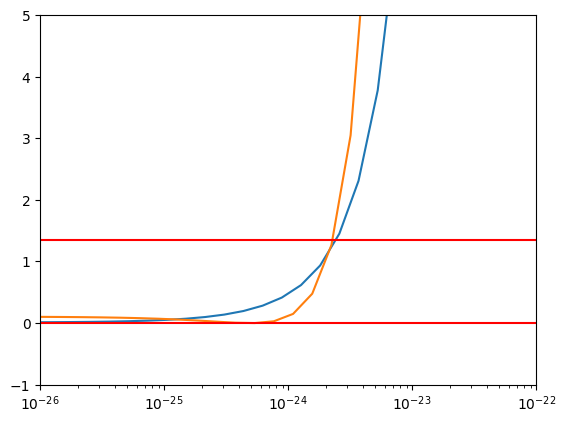

In [83]:
v = (mle.g[0]/1e-23*mle._likelihood[:,0]-mle.g[0])**2/2
v = v-min(v)
plt.plot(mle._likelihood[:,0], mle._likelihood[:,1])
plt.plot(mle._likelihood[:,0]/20, v*0.00001)
#plt.plot(mle._likelihood[:,0], np.sqrt(np.geomspace(1e-2, 1e3, len(mle._likelihood[:,0]))))
plt.xscale("log")
plt.ylim(-1, 5)
plt.xlim(1e-26, 1e-22)
plt.axhline(0, color="r")
plt.axhline(1.35, color="r")

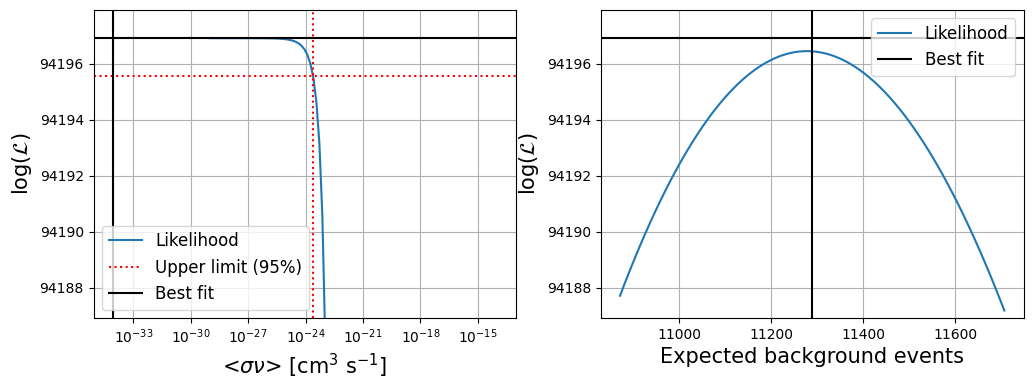

In [25]:
mle.plotProfileLikelihood()

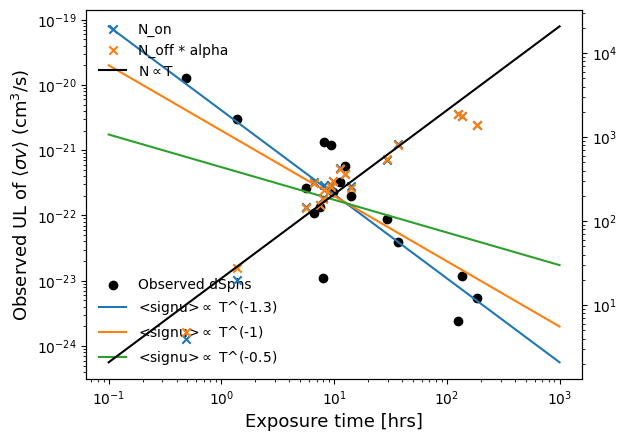

In [79]:
plt.scatter(test[:,1]/3600, 10**test[:,0], color="k", label="Observed dSphs")

#plt.axhline(2.4e-26, color="r", label="Thermla relic", ls=":")
#plt.scatter(totsig[4], 10**test[:,0][4], label="Draco II (8 hrs)")

plt.plot(np.geomspace(1e-1, 1e3, 100), 10**linear(np.log10(np.geomspace(1e-1, 1e3, 100)), *p), label=rf"<signu>$\propto$ T^({p[0]:.1f})")
plt.plot(np.geomspace(1e-1, 1e3, 100), 10**linear(np.log10(np.geomspace(1e-1, 1e3, 100)), -1, -20.7), label=rf"<signu>$\propto$ T^(-1)")
plt.plot(np.geomspace(1e-1, 1e3, 100), 10**linear(np.log10(np.geomspace(1e-1, 1e3, 100)), -0.5, -21.26), label=rf"<signu>$\propto$ T^(-0.5)")


#plt.scatter(totsig[4]/8*100, 10**linear(np.log10(totsig[4]/8*100), -1, -21.5), label="Draco II (100 hrs; expected)")

ax = plt.gca()
ax2 = ax.twinx()
ax2.scatter(test[:,1]/3600, test[:,3], marker="x", label="N_on")
ax2.scatter(test[:,1]/3600, test[:,4]*0.167, marker="x", label="N_off * alpha")
ax2.plot(np.geomspace(1e-1, 1e3, 100), 10**linear(np.log10(np.geomspace(1e-1, 1e3, 100)), 1, 1.32), color="k", label=r"N$\propto$T")
ax2.set_yscale("log")
ax2.legend(frameon=False)

ax.legend(fontsize=10, loc=3, frameon=False)
ax.set_xlabel(r"Exposure time [hrs]", fontsize=13)
ax.set_ylabel(r"Observed UL of $\langle \sigma v \rangle$ (cm$^{3}$/s)", fontsize=13)
ax.set_xscale("log")
ax.set_yscale("log")


(0.1, 1000.0)

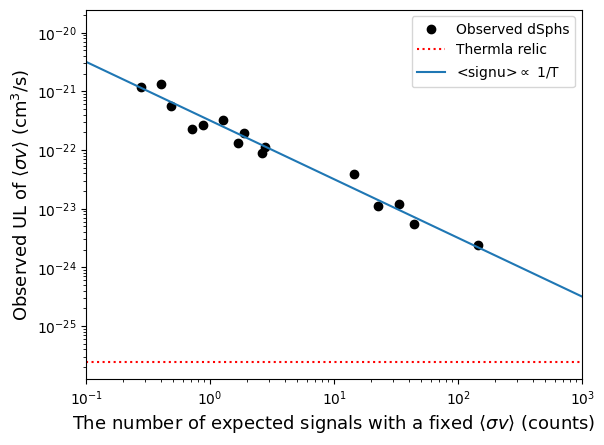

In [21]:
plt.scatter(totsig, 10**test[:,0], color="k", label="Observed dSphs")
plt.axhline(2.4e-26, color="r", label="Thermla relic", ls=":")
#plt.scatter(totsig[4], 10**test[:,0][4], label="Draco II (8 hrs)")

plt.plot(np.geomspace(1e-1, 1e3, 100), 10**linear(np.log10(np.geomspace(1e-1, 1e3, 100)), -1, -21.5), label=r"<signu>$\propto$ 1/T")


#plt.scatter(totsig[4]/8*100, 10**linear(np.log10(totsig[4]/8*100), -1, -21.5), label="Draco II (100 hrs; expected)")

plt.legend(fontsize=10, loc=1)
plt.xlabel(r"The number of expected signals with a fixed $\langle \sigma v \rangle$ (counts)", fontsize=13)
plt.ylabel(r"Observed UL of $\langle \sigma v \rangle$ (cm$^{3}$/s)", fontsize=13)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.1, 1e3)

Text(0, 0.5, '(B1-B0)')

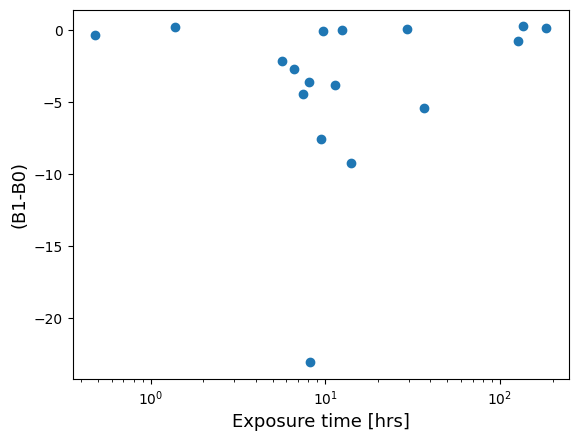

In [24]:
plt.scatter(test[:,0]/(60*60), test[:,1])
plt.xscale("log")
plt.xlabel("Exposure time [hrs]", fontsize=13)
plt.ylabel("(B1-B0)", fontsize=13)

In [3]:
exp = np.geomspace(3600*5, 180*3600, 20)

In [19]:
uls = []
data = EventDisplay.readData("UMa_II", rawdata=True, ext=True)
irf = ResponseFunction.EventDisplay.readIRFs("UMa_II", ext=True)
default_time = irf.exposure
N_on_def = sum(data[:,2] == 1)/default_time
N_off_def = sum(data[:,2] == 0)/default_time

for i in trange(1000):
    temp = []
    for t in exp:    
        bkg = data[data[:,2] == 0]
        N_on = np.random.poisson(int(N_on_def*t))
        N_off = np.random.poisson(int(N_off_def*t))

        selected = np.random.randint(N_on_def*default_time, size=N_on)
        bkg_selected = np.random.randint(N_off_def*default_time, size=N_off)

        events = bkg[selected]
        bkg_events = bkg[bkg_selected]

        events[:,2] = 1

        events = np.concatenate([events, bkg_events])

        processes = []

        hOn, hOff = eventdisplay.readData("UMa_II", events=events, bkgModel="gaus", ext=True)

        irf.exposure = t

        mle = MLE("UMa_II", 10000, irf=irf, jSeed=const.defaultNum["UMa_II"], 
                  ext=True, verbose=False, bkgModel="gaus", events=events,
                  N_off = N_off, N_on = N_on, hOff = hOff, 
                  hOn = hOn)

        mle.minuit(method=2)
        temp.append([mle.signu_ul, N_on, N_off])
    
    uls.append(temp)

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/dtak/Research/scripts/dm_analysis/DarkMatter/Likelihood/fcn.py:31: RuntimeWarning: invalid value encountered in log
  logl = args["N_off"]*np.log(b) - g - (args["alpha"]+1)*b
/Users/dtak/Research/scripts/dm_analysis/DarkMatter/Likelihood/fcn.py:31: RuntimeWarning: invalid value encountered in log
  logl = args["N_off"]*np.log(b) - g - (args["alpha"]+1)*b


  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 2 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 2 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 2 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 2 VARIABLE PARAMET

In [254]:
temp = []
for M in [1000, 2000, 5000, 10000, 20000, 50000, 100000]:   
    
    mle = MLE("UMa_II", M, irf=irf, jSeed=const.defaultNum["UMa_II"], 
              ext=True, verbose=False, bkgModel="gaus")

    mle.minuit(method=2)
    temp.append([mle.p_on, mle.p_off])


Text(0, 0.5, 'Counts')

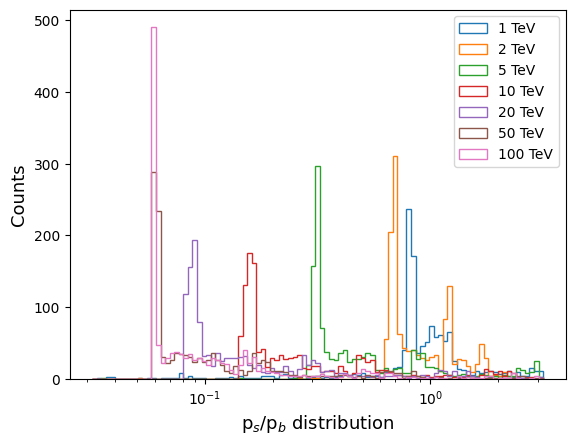

In [262]:
for t, M in zip(temp, [1000, 2000, 5000, 10000, 20000, 50000, 100000]):
    plt.hist(t[0][0]/t[1][0], bins=np.logspace(-1.5, 0.5, 100), histtype="step", label=f"{int(M/1000)} TeV")
plt.xscale("log")
plt.legend()
plt.xlabel(r"p$_s$/p$_b$ distribution", fontsize=13)
plt.ylabel(r"Counts", fontsize=13)

In [3]:
def likelihood(N, ts, tb, m, S, B):
    d = np.sqrt(((ts+tb)*m*N-S-B)**2.+4*(ts+tb)*B*m*N)
#    f = (S+B)/(ts+tb)
    f = (S+B-(ts+tb)*m*N+d)/(2*(ts+tb))
    l = sum(np.nan_to_num(ts*m*N+(ts+tb)*f-S*np.log(ts*m*N+ts*f)-B*np.log(tb*f)-S*(1-np.log(S))-B*(1-np.log(B))))
    return l

def likelihood2(N, ts, tb, m, S, B):
    l = np.log(sum(m)*N*ts+ts*sum(B)/tb)*sum(S)
#    l = sum(ts*m*N+(ts+tb)*f-S*np.log(ts*m*N+ts*f)-B*np.log(tb*f)-S*(1-np.log(S))-B*(1-np.log(B)))
    return l

def likelihood3(signu, g_arr, b_obs, on_obs, alpha):
    g = sum(g_arr)*10**signu
    g_arr = g_arr*10**signu

    d = np.sqrt(((1+1./alpha)*g_arr-on_obs-b_obs)**2.+4*(1+1./alpha)*b_obs*g_arr)
    b_arr = (on_obs+b_obs-(1+1./alpha)*g_arr+d)/(2*(1+alpha))
    b = sum(b_arr)
#    b = sum(on_obs+b_obs)/(1+alpha)

#    b_arr = b_obs/sum(b_obs)*b

    valid = (b_arr !=0)

    g_arr = g_arr[valid]
    b_arr = b_arr[valid]
    b_obs = b_obs[valid]
    on_obs = on_obs[valid]

    logl = -g - (1+alpha)*b+sum(np.nan_to_num(on_obs*np.log(g_arr+alpha*b_arr)+b_obs*np.log(b_arr)))

    return -logl


In [81]:
sum(getArray(hOn)[1])

117.0

In [82]:
mle.N_off

8402

In [99]:
hOn

In [223]:
sum(mle.p_on[0]/mle.p_off[0]/mle.b[0]/alpha)

0.826144967186864

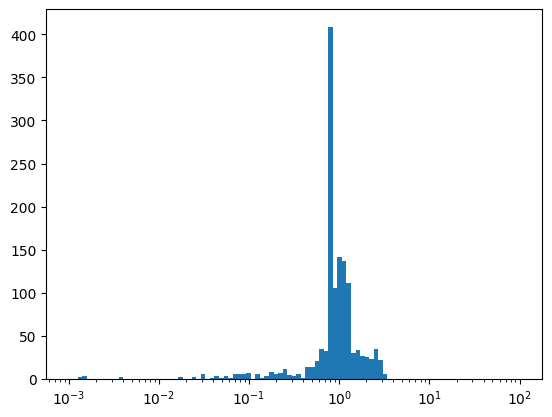

In [241]:
plt.hist(mle.p_on[0]/mle.p_off[0], bins=np.logspace(-3, 2, 100))
plt.xscale("log")

In [3]:
uls_u = []
data = EventDisplay.readData("UMa_II", rawdata=True, ext=True)
irf = ResponseFunction.EventDisplay.readIRFs("UMa_II", ext=True)
default_time = irf.exposure
N_on_def = sum(data[:,2] == 1)/default_time
N_off_def = sum(data[:,2] == 0)/default_time

exp = np.geomspace(3600*5, 180*3600, 10)
for t in exp:   
    temp = []
    for i in range(100): 
        bkg = data[data[:,2] == 0]
#         N_on = np.random.poisson(int(N_on_def*t))
#         N_off = np.random.poisson(int(N_off_def*t))
        N_on = int(N_on_def*t)
        N_off = int(N_off_def*t)
        selected = np.random.randint(N_on_def*default_time, size=N_on)
        bkg_selected = np.random.randint(N_off_def*default_time, size=N_off)

        events = bkg[selected]
        bkg_events = bkg[bkg_selected]

        events[:,2] = 1

        events = np.concatenate([events, bkg_events])

        hOn, hOff = eventdisplay.readData("UMa_II", events=events, bkgModel="gaus", ext=True)

        irf.exposure = t

        mle = MLE("UMa_II", 20000, irf=irf, jSeed=const.defaultNum["UMa_II"], 
                  ext=True, verbose=False, bkgModel="gaus", events=events,
                  N_off = N_off, N_on = N_on, hOff = hOff, correction=True,
                  hOn = hOn, expectedLimit=True)

        mle.minuit(method=2)

#        print(sum(mle.p_on[0]/mle.p_off[0]/mle.b[0]/alpha))

#         bkgModel =  mle.args["hOff"]
#         observation = mle.args["hOn"]
#         sourceModel = mle.args["hSig"]
#         alpha = mle.args["alpha"]

#         nullL = likelihood3(-50, np.zeros(len(bkgModel)), bkgModel, observation, alpha)


#         def profL(N):
#             return [-nullL+likelihood3(n, sourceModel, bkgModel, observation, alpha) for n in N]

#         def deltaL(N):
#             return -nullL+likelihood3(N, sourceModel, bkgModel, observation, alpha)

#         def fcn(N):
#             return deltaL(N)-1.35

#         N_solution = fsolve(fcn, 100)[0]
#         ul_alt = -23+N_solution

        temp.append([t, mle.signu_ul, N_on, N_off])
        
    uls_u.append(temp)

uls_u=np.asarray(uls_u)

In [4]:
exp/3600

array([  5.        ,   7.44547662,  11.08702443,  16.50963624,
        24.58442214,  36.60854808,  54.51361778,  81.17597338,
       120.87876244, 180.        ])

In [5]:
cont = []
for ul in uls:
    cont.append([10**np.percentile(ul[:,1], 50), 
                 10**np.percentile(ul[:,1], 50)-10**np.percentile(ul[:,1], 16),
                 10**np.percentile(ul[:,1], 84)-10**np.percentile(ul[:,1], 50)])

cont=np.array(cont)

cont_u = []
for ul in uls_u:
    cont_u.append([10**np.percentile(ul[:,1], 50), 
                 10**np.percentile(ul[:,1], 50)-10**np.percentile(ul[:,1], 16),
                 10**np.percentile(ul[:,1], 84)-10**np.percentile(ul[:,1], 50)])

cont_u=np.array(cont_u)


plt.errorbar(exp, cont[:,0], yerr=[cont[:,1], cont[:,2]])
plt.errorbar(exp, cont_u[:,0]/2., yerr=[cont_u[:,1], cont_u[:,2]])
plt.plot(exp, 10**-20/np.sqrt(exp), label="1/sqrt(T)")
plt.plot(exp, 10**-17.5/(exp), label="1/T")
plt.xlabel("Exposure", fontsize=15)
plt.ylabel("Upper limit of a parameter", fontsize=15)
plt.legend()
plt.xscale("log")
plt.yscale("log")

NameError: name 'uls' is not defined

In [152]:
uls

array([[[180000.        ,            -inf,            -inf],
        [192553.57403904,            -inf,            -inf],
        [205982.66041781,            -inf,            -inf],
        [220348.31918622,            -inf,            -inf],
        [235715.86884889,            -inf,            -inf],
        [252155.18335872,            -inf,            -inf],
        [269741.00982328,            -inf,            -inf],
        [288553.30836873,            -inf,            -inf],
        [308677.61570659,            -inf,            -inf],
        [330205.4340564 ,            -inf,            -inf],
        [353234.64719262,            -inf,            -inf],
        [377869.96550754,            -inf,            -inf],
        [404223.4021138 ,            -inf,            -inf],
        [432414.78215128,            -inf,            -inf],
        [462572.28761411,            -inf,            -inf],
        [494833.04017505,            -inf,            -inf],
        [529343.72465727

In [142]:
 profL(np.linspace(-30, -14)+23)

[1.985759467970638e-08,
 4.21168238062819e-08,
 8.932772743719397e-08,
 1.8945974034068058e-07,
 4.0183482497013756e-07,
 8.522719383563526e-07,
 1.8076270862366073e-06,
 3.833889422821812e-06,
 8.131496201713162e-06,
 1.724652685197725e-05,
 3.657913896404352e-05,
 7.758301856597427e-05,
 0.00016455184720598481,
 0.00034901572180956464,
 0.0007402871978570147,
 0.001570301676224517,
 0.003331382287001361,
 0.0070695185194153964,
 0.015011274030030108,
 0.03191530107528706,
 0.0680365628278139,
 0.14584657637939813,
 0.31617642880266317,
 0.7004131424002082,
 1.6110563700907505,
 3.909845380967397,
 9.994412130006737,
 26.013104339469294,
 65.96326509424114,
 159.57865965260336,
 369.26750697960404,
 826.6171387103597,
 1810.094059283961,
 3909.9159480754824,
 8377.716611086493,
 17868.142598590923,
 38011.616953441124,
 80749.90673954171,
 171410.80007641477,
 363713.23113606544,
 771592.3941662444,
 1636699.2285687015,
 3471563.5033470932,
 7363235.684608016,
 15617296.422462625,
 33

(0.0, 3.0)

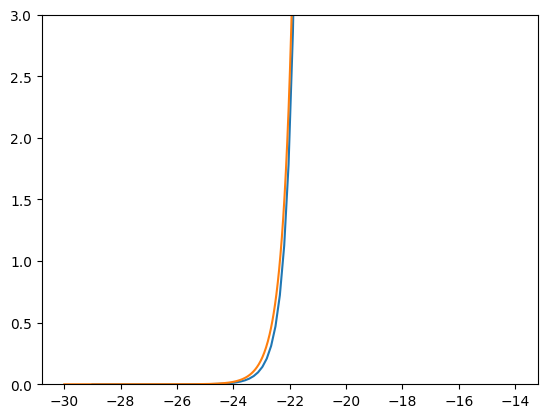

In [145]:
plt.plot(mle.gL[:,0], mle.gL[:,1])
plt.plot(np.linspace(-30, -14, 1000), profL(np.linspace(-30, -14, 1000)+23))
plt.ylim(0, 3)

In [128]:
temp

[[10000, -22.141797433231208, -22.231002781432405, 21, 127]]

In [ ]:
plt.plot(hOn)
plt.plot(mle.args["hOn"])

In [100]:
getArray(hOn)

(array([1.07407681e+01, 1.23320518e+01, 1.41590899e+01, 1.62568104e+01,
        1.86653157e+01, 2.14306498e+01, 2.46056782e+01, 2.82510986e+01,
        3.24366011e+01, 3.72422011e+01, 4.27597680e+01, 4.90947825e+01,
        5.63683523e+01, 6.47195278e+01, 7.43079603e+01, 8.53169537e+01,
        9.79569694e+01, 1.12469649e+02, 1.29132435e+02, 1.48263873e+02,
        1.70229703e+02, 1.95449849e+02, 2.24406452e+02, 2.57653081e+02,
        2.95825318e+02, 3.39652910e+02, 3.89973719e+02, 4.47749738e+02,
        5.14085483e+02, 5.90249109e+02, 6.77696652e+02, 7.78099866e+02,
        8.93378179e+02, 1.02573539e+03, 1.17770180e+03, 1.35218259e+03,
        1.55251334e+03, 1.78252381e+03, 2.04661117e+03, 2.34982403e+03,
        2.69795897e+03, 3.09767136e+03, 3.55660259e+03, 4.08352614e+03,
        4.68851533e+03, 5.38313585e+03, 6.18066693e+03, 7.09635512e+03,
        8.14770582e+03, 9.35481795e+03, 1.07407681e+04, 1.23320518e+04,
        1.41590899e+04, 1.62568104e+04, 1.86653157e+04, 2.143064

In [105]:
mle.args["hOn"]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        2., 10.,  9., 11.,  9.,  8.,  2.,  1.,  3.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

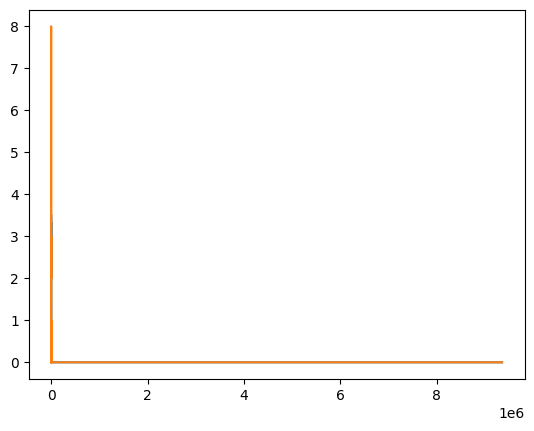

In [124]:
plt.plot(getArray(hOff)[0], getArray(hOff)[1])
plt.plot(getArray(hOff)[0], getArray(hOn)[1])

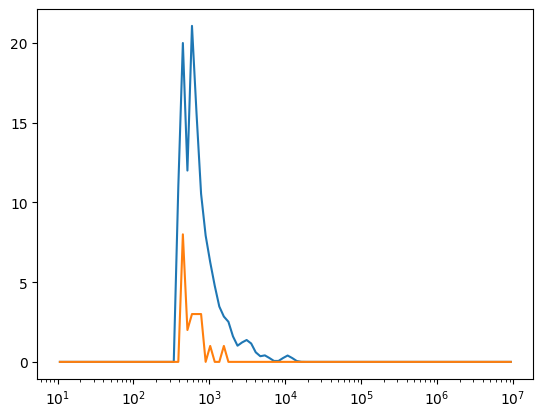

In [126]:
#plt.plot(getArray(hOff)[0], getArray(hOff)[1])
#plt.plot(getArray(hOff)[0], getArray(hOn)[1])
plt.plot(getArray(hOff)[0], mle.args["hOff"])
plt.plot(getArray(hOff)[0], mle.args["hOn"])
plt.xscale("log")

In [93]:
N_on, sum(mle.args["hSig"])

(1366, 43.43506406435074)

In [ ]:
plt.plot(mle.gL[:,0], mle.gL[:,1])
plt.plot(mle.gL[:,0], profL(mle.gL[:,0]+23))
plt.ylim(-10, 10)

In [266]:
uls_u

array([[[ 1.80000000e+04, -2.14378205e+01, -2.14722502e+01,
          3.70000000e+01,  2.29000000e+02],
        [ 1.80000000e+04, -2.16505039e+01, -2.16470649e+01,
          3.70000000e+01,  2.29000000e+02],
        [ 1.80000000e+04, -2.12201386e+01, -2.16471659e+01,
          3.70000000e+01,  2.29000000e+02],
        [ 1.80000000e+04, -2.11580554e+01, -2.13250618e+01,
          3.70000000e+01,  2.29000000e+02],
        [ 1.80000000e+04, -2.11671471e+01, -2.13297933e+01,
          3.70000000e+01,  2.29000000e+02],
        [ 1.80000000e+04, -2.11664078e+01, -2.12683360e+01,
          3.70000000e+01,  2.29000000e+02],
        [ 1.80000000e+04, -2.14676807e+01, -2.14889922e+01,
          3.70000000e+01,  2.29000000e+02],
        [ 1.80000000e+04, -2.11739718e+01, -2.13102323e+01,
          3.70000000e+01,  2.29000000e+02],
        [ 1.80000000e+04, -2.13284203e+01, -2.14013500e+01,
          3.70000000e+01,  2.29000000e+02],
        [ 1.80000000e+04, -2.11181527e+01, -2.12617386e+01,
    

In [265]:
plt.plot(uls[:,0]/3600, 10**uls_u[:,1], label="Simulated UL at 1 TeV (method 1)", ls="-")
plt.plot(uls[:,0]/3600, 10**uls_u[:,2], label="Simulated UL at 1 TeV (method 2)",  ls="-")
plt.loglog(uls[:,0]/3600, uls_u[:,0][0]/uls_u[:,0]*10**uls[0][2], label="1/t", ls=":")
plt.loglog(uls[:,0]/3600, np.sqrt(uls_u[:,0][0]/uls_u[:,0])*10**uls_u[0][2]/4, label=r"1/t$^{1/2}$", ls=":")
plt.legend()
plt.xlabel("Exposure time [hrs]", fontsize=13)
plt.ylabel(r"Upper limit [cm$^3$/s]", fontsize=13)

/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_10886/1486457081.py:1: RuntimeWarning: overflow encountered in power
  plt.plot(uls[:,0]/3600, 10**uls_u[:,1], label="Simulated UL at 1 TeV (method 1)", ls="-")
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_10886/1486457081.py:2: RuntimeWarning: overflow encountered in power
  plt.plot(uls[:,0]/3600, 10**uls_u[:,2], label="Simulated UL at 1 TeV (method 2)",  ls="-")
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_10886/1486457081.py:3: RuntimeWarning: overflow encountered in power
  plt.loglog(uls[:,0]/3600, uls_u[:,0][0]/uls_u[:,0]*10**uls[0][2], label="1/t", ls=":")
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_10886/1486457081.py:4: RuntimeWarning: overflow encountered in power
  plt.loglog(uls[:,0]/3600, np.sqrt(uls_u[:,0][0]/uls_u[:,0])*10**uls_u[0][2]/4, label=r"1/t$^{1/2}$", ls=":")


Text(0, 0.5, 'Upper limit [cm$^3$/s]')

Error in callback <function _draw_all_if_interactive at 0x10f94c3a0> (for post_execute):


OverflowError: cannot convert float infinity to integer

OverflowError: cannot convert float infinity to integer

<Figure size 640x480 with 1 Axes>

In [148]:
plt.plot(uls[:,0]/3600, 10**uls[:,1], label="Simulated UL at 1 TeV (method 1)", ls="-")
plt.plot(uls[:,0]/3600, 10**uls[:,2], label="Simulated UL at 1 TeV (method 2)",  ls="-")
plt.loglog(uls[:,0]/3600, uls[:,0][0]/uls[:,0]*10**uls[0][2], label="1/t", ls=":")
plt.loglog(uls[:,0]/3600, np.sqrt(uls[:,0][0]/uls[:,0])*10**uls[0][2], label=r"1/t$^{1/2}$", ls=":")
plt.legend()
plt.xlabel("Exposure time [hrs]", fontsize=13)
plt.ylabel(r"Upper limit [cm$^3$/s]", fontsize=13)

TypeError: list indices must be integers or slices, not tuple

In [22]:
uls[:,2]/uls[:,3]

array([0.16157205, 0.16304348, 0.16467066])

In [224]:
def likelihood(N, ts, tb, m, S, B):
    d = np.sqrt(((ts+tb)*m*N-S-B)**2.+4*(ts+tb)*B*m*N)
#    f = (S+B)/(ts+tb)
    f = (S+B-(ts+tb)*m*N+d)/(2*(ts+tb))
    l = sum(np.nan_to_num(ts*m*N+(ts+tb)*f-S*np.log(ts*m*N+ts*f)-B*np.log(tb*f)-S*(1-np.log(S))-B*(1-np.log(B))))
    return l

def likelihood2(N, ts, tb, m, S, B):
    l = np.log(sum(m)*N*ts+ts*sum(B)/tb)*sum(S)
#    l = sum(ts*m*N+(ts+tb)*f-S*np.log(ts*m*N+ts*f)-B*np.log(tb*f)-S*(1-np.log(S))-B*(1-np.log(B)))
    return l

def likelihood3(signu, g_arr, b_obs, on_obs, alpha, b):
    g = sum(g_arr)*10**signu
    g_arr = g_arr*10**signu

#     d = np.sqrt(((1+1./alpha)*g_arr-on_obs-b_obs)**2.+4*(1+1./alpha)*b_obs*g_arr)
#     b_arr = (on_obs+b_obs-(1+1./alpha)*g_arr+d)/(2*(1+alpha))
#     b = sum(b_arr)
#    b = sum(on_obs+b_obs)/(1+alpha)

    b_arr = b_obs/sum(b_obs)*b


    b_obs = b_obs

    valid = (b_arr !=0)

    g_arr[g_arr < 1e-10] = 0
    g_arr = g_arr[valid]
    b_arr = b_arr[valid]
    b_obs = b_obs[valid]
    on_obs = on_obs[valid]

    logl = -g - (1+alpha)*b+sum(np.nan_to_num(on_obs*np.log(g_arr+alpha*b_arr)+b_obs*np.log(b_arr)))

    return -logl


(1e-15, 1091257008.6876667)

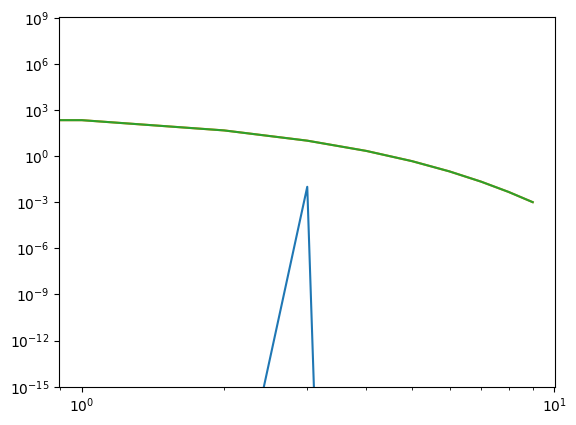

In [102]:
plt.plot(gauss(E, 0.01, 10, 0.5))
plt.plot(bkgModel)
plt.plot(observation)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-15, )

0.167
0.16699999999999998
0.16699999999999998
0.167
0.167
0.167
0.167
0.167
0.167
0.167
0.16700000000000004
0.167
0.167
0.167


/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_10886/2414101810.py:40: RuntimeWarning: divide by zero encountered in log
  test.append([exposure, sum(np.log(sourceModel*ts*10**N_solution+0.167*bkgModel*tb)), sum(np.log(0.167*bkgModel*tb))])


0.167
0.167
0.167
0.167
0.167
0.167


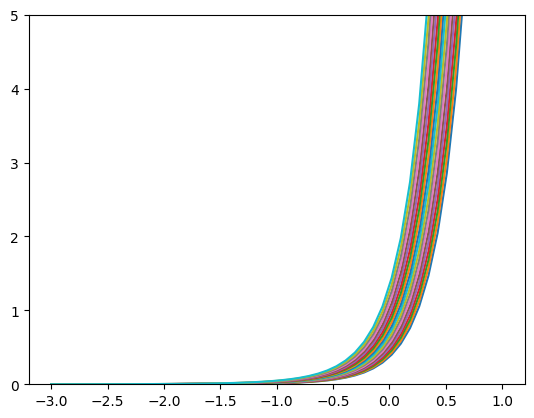

In [65]:
powerlaw = lambda E, N, a: N*(E/100)**a

E = np.geomspace(1, 1000, 10)

def gauss(E, N, E0, std):
    return np.exp(-1./2*(E-E0)**2/std**2)*N

ul = []
test = []
exp = np.geomspace(3600*50, 180*3600, 20)
for exposure in exp:
    alpha=0.167
#     valid = mle.args["hOff"]!=0
    bkgModel =  mle.args["hOff"]/mle.args["exposure"]*alpha
    observation = mle.args["hOn"]/mle.args["exposure"]
    sourceModel = mle.args["hSig"]/mle.args["exposure"]
#     bkgModel = powerlaw(E, 0.1, -2)
#     observation = powerlaw(E, 0.1, -2)
#     sourceModel = powerlaw(E, 0.00001, -1.5)

    #sourceModel = gauss(E, 0.0001, 100, 0.1)
    
    
    tb = exposure/alpha
    ts = exposure
    print(ts/tb)
    nullL = likelihood3(0, np.zeros(len(bkgModel))*ts, bkgModel*tb, observation*ts, alpha)


    def profL(N):
        return [-nullL+likelihood3(n, sourceModel*ts, bkgModel*tb, observation*ts, alpha) for n in N]

    def deltaL(N):
        return -nullL+likelihood3(N, sourceModel*ts, bkgModel*tb, observation*ts, alpha)

    def fcn(N):
        return deltaL(N)-1.35

    N_solution = fsolve(fcn, 100)[0]
    test.append([exposure, sum(np.log(sourceModel*ts*10**N_solution+0.167*bkgModel*tb)), sum(np.log(0.167*bkgModel*tb))])
    
    ul.append(10**(N_solution-23))
    plt.plot(np.linspace(-3, 1), profL(np.linspace(-3, 1)))
    plt.ylim(0, 5)
ul=np.asarray(ul)

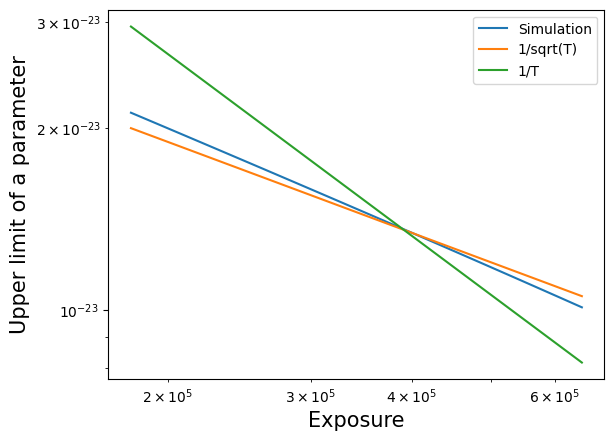

In [74]:
plt.plot(exp, ul, label="Simulation")
plt.xscale("log")
plt.yscale("log")
plt.plot(exp, ul[0]*400/np.sqrt(exp), label="1/sqrt(T)")
plt.plot(exp, ul[0]*250000/(exp), label="1/T")
plt.xlabel("Exposure", fontsize=15)
plt.ylabel("Upper limit of a parameter", fontsize=15)
plt.legend()

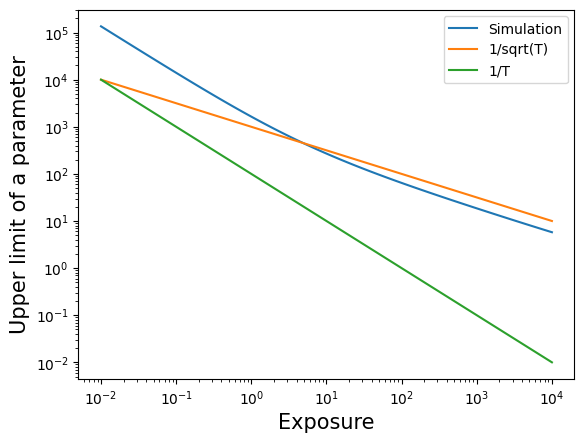

In [124]:
plt.plot(exp, ul, label="Simulation")
plt.xscale("log")
plt.yscale("log")
plt.plot(exp, 1000/np.sqrt(exp), label="1/sqrt(T)")
plt.plot(exp, 100/(exp), label="1/T")
plt.xlabel("Exposure", fontsize=15)
plt.ylabel("Upper limit of a parameter", fontsize=15)
plt.legend()

In [48]:
ul = []
exp = np.geomspace(0.01, 10, 100)
for exposure in exp:
    alpha=0.167
    valid = mle.args["hOff"]!=0
    bkgModel =  mle.args["hOff"][valid]*exposure
    observation = mle.args["hOn"][valid]*exposure
            
    sourceModel = mle.args["hSig"][valid]/26247

    nullL = likelihood(0, 26247*exposure, 26247*exposure/alpha, sourceModel, observation, bkgModel)


    def profL(N):
        return [-nullL+likelihood(n, 26247*exposure, 26247*exposure/alpha, sourceModel, observation, bkgModel) for n in N]

    def deltaL(N):
        return -nullL+likelihood(N, 26247*exposure, 26247*exposure/alpha, sourceModel, observation, bkgModel)

    def fcn(N):
        return deltaL(N)-1.35

    N_solution = fsolve(fcn, 100)[0]
    ul.append(N_solution)
    
ul=np.asarray(ul)

/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_1419/959532572.py:5: RuntimeWarning: divide by zero encountered in log
  l = sum(np.nan_to_num(ts*m*N+(ts+tb)*f-S*np.log(ts*m*N+ts*f)-B*np.log(tb*f)-S*(1-np.log(S))-B*(1-np.log(B))))
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_1419/959532572.py:5: RuntimeWarning: invalid value encountered in multiply
  l = sum(np.nan_to_num(ts*m*N+(ts+tb)*f-S*np.log(ts*m*N+ts*f)-B*np.log(tb*f)-S*(1-np.log(S))-B*(1-np.log(B))))


In [51]:
ul

array([2.55510000e+06, 2.55510000e+06, 2.55510000e+06, 2.55510000e+06,
       2.56510000e+06, 2.55510000e+06, 2.56510000e+06, 2.55510000e+06,
       2.56510000e+06, 2.55510000e+06, 2.56510000e+06, 5.12010000e+06,
       2.56510000e+06, 2.56510000e+06, 2.56510000e+06, 2.55510000e+06,
       2.55510000e+06, 2.56510000e+06, 2.56510000e+06, 2.55510000e+06,
       2.55510000e+06, 2.55510000e+06, 2.56510000e+06, 2.55510000e+06,
       2.56510000e+06, 2.56510000e+06, 2.67310646e+08, 2.56959732e+08,
       2.47019750e+08, 2.37472999e+08, 2.28302620e+08, 2.19492551e+08,
       2.11027485e+08, 2.02892833e+08, 1.95074686e+08, 1.87559783e+08,
       1.80335474e+08, 1.73389692e+08, 1.66710923e+08, 1.60288180e+08,
       1.54110973e+08, 1.48169286e+08, 1.42453557e+08, 1.36954648e+08,
       1.31663833e+08, 1.26572770e+08, 1.21673488e+08, 1.16958366e+08,
       1.12420117e+08, 1.08051771e+08, 1.03846663e+08, 9.97984139e+07,
       9.59009200e+07, 9.21483394e+07, 8.85350795e+07, 8.50557854e+07,
      

In [50]:
plt.scatter(exp/3600, 10**ul, label="Simulated UL at 1 TeV", color="k", marker="x")
plt.loglog(exp/3600, exp[0]/exp*10**ul[0], label="1/t")
plt.loglog(exp/3600, np.sqrt(exp[0]/exp)*10**ul[0], label=r"1/t$^{1/2}$")
plt.loglog(exp/3600, (exp[0]/exp)**2.*10**ul[0], label=r"1/t$^2$")
plt.legend()
plt.xlabel("Exposure time [hrs]", fontsize=13)
plt.ylabel(r"Upper limit [cm$^3$/s]", fontsize=13)

/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_1419/3698844638.py:1: RuntimeWarning: overflow encountered in power
  plt.scatter(exp/3600, 10**ul, label="Simulated UL at 1 TeV", color="k", marker="x")
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_1419/3698844638.py:2: RuntimeWarning: overflow encountered in double_scalars
  plt.loglog(exp/3600, exp[0]/exp*10**ul[0], label="1/t")
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_1419/3698844638.py:3: RuntimeWarning: overflow encountered in double_scalars
  plt.loglog(exp/3600, np.sqrt(exp[0]/exp)*10**ul[0], label=r"1/t$^{1/2}$")
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_1419/3698844638.py:4: RuntimeWarning: overflow encountered in double_scalars
  plt.loglog(exp/3600, (exp[0]/exp)**2.*10**ul[0], label=r"1/t$^2$")


Text(0, 0.5, 'Upper limit [cm$^3$/s]')

Error in callback <function _draw_all_if_interactive at 0x11374c3a0> (for post_execute):


ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 640x480 with 1 Axes>

# Renormalized

Text(0, 0.5, 'Upper limit [cm$^3$/s]')

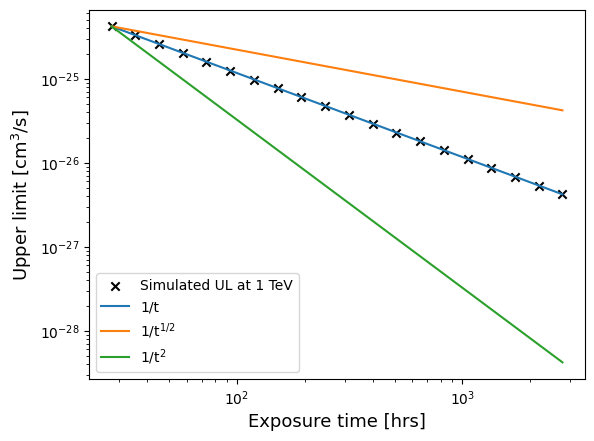

In [86]:
plt.scatter(exp/3600, 10**uls, label="Simulated UL at 1 TeV", color="k", marker="x")
plt.loglog(exp/3600, exp[0]/exp*10**uls[0], label="1/t")
plt.loglog(exp/3600, np.sqrt(exp[0]/exp)*10**uls[0], label=r"1/t$^{1/2}$")
plt.loglog(exp/3600, (exp[0]/exp)**2.*10**uls[0], label=r"1/t$^2$")
plt.legend()
plt.xlabel("Exposure time [hrs]", fontsize=13)
plt.ylabel(r"Upper limit [cm$^3$/s]", fontsize=13)